<a href="https://colab.research.google.com/github/mikemwai/artificial_intelligence/blob/main/ML_task_one/ML_task_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# 1) Import the necessary Libraries




In [37]:
# Data Library
from pandas import read_csv

# Deep Learning Libraries
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Data Visualization Library
from matplotlib import pyplot as plt

# Machine learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 2) Read CSV file & Create DataFrames

In [31]:
dataframe = read_csv("Nairobi Office Price Ex.csv")
print(dataframe.describe())
dataframe

            SIZE      PRICE
count  14.000000  14.000000
mean   50.297203  68.609140
std     8.080935  14.065415
min    32.502345  31.707006
25%    45.933708  62.147288
50%    52.380906  71.423756
75%    54.944550  77.506856
max    61.530358  87.230925


,LOC,FUR,AMB,PROX_SCH,PROX_ROAD,PROX_MALL,WATER,HK_SER,SIZE,PRICE
0,karen,yes,serene,no,yes,yes,yes,yes,32.502345,31.707006
1,madaraka,yes,semi_serene,yes,yes,yes,no,no,53.426804,68.777596
2,karen,no,noisy,no,yes,yes,yes,yes,61.530358,62.562382
3,karen,yes,semi_serene,no,no,no,yes,yes,47.475640,71.546632
4,buruburu,no,semi_serene,no,yes,yes,yes,yes,59.813208,87.230925
5,donholm,no,serene,no,no,yes,no,yes,55.142188,78.211518
6,langata,no,very_noisy,yes,yes,no,no,yes,52.211797,79.641973
7,langata,yes,serene,no,no,yes,yes,no,39.299567,59.171489
8,donholm,yes,semi_serene,yes,no,no,yes,no,48.105042,75.331242
9,karen,yes,serene,no,no,no,no,no,52.550014,71.300880


In [36]:
X = dataframe["SIZE"]
y = dataframe["PRICE"]
print(X)
print(y)

0     32.502345
1     53.426804
2     61.530358
3     47.475640
4     59.813208
5     55.142188
6     52.211797
7     39.299567
8     48.105042
9     52.550014
10    45.419730
11    54.351635
12    44.164049
13    58.168471
Name: SIZE, dtype: float64
0     31.707006
1     68.777596
2     62.562382
3     71.546632
4     87.230925
5     78.211518
6     79.641973
7     59.171489
8     75.331242
9     71.300880
10    55.165677
11    82.478847
12    62.008923
13    75.392870
Name: PRICE, dtype: float64


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=20)
print(X_train)
print(X_test)

1     53.426804
5     55.142188
0     32.502345
2     61.530358
7     39.299567
6     52.211797
4     59.813208
9     52.550014
12    44.164049
10    45.419730
3     47.475640
Name: SIZE, dtype: float64
13    58.168471
11    54.351635
8     48.105042
Name: SIZE, dtype: float64


# 3) Artificial Neural Network Model

In [30]:
# Scalling the data
scaler = StandardScaler()
scaler.fit(X_train.values.reshape(-1, 1))

X_train_scaled = scaler.transform(X_train.values.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.values.reshape(-1, 1))


model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                128       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
history = model.fit(X_train_scaled,y_train,validation_split=0.2,epochs=1000)
print(history)

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 4805.9224 - mae: 67.4512 - val_loss: 4005.9199 - val_mae: 62.9323
Epoch 2/1000
1/1 [==============================] - 0s 66ms/step - loss: 4800.0396 - mae: 67.4062 - val_loss: 4003.6282 - val_mae: 62.9139
Epoch 3/1000
1/1 [==============================] - 0s 51ms/step - loss: 4800.5527 - mae: 67.4177 - val_loss: 4001.3379 - val_mae: 62.8954
Epoch 4/1000
1/1 [==============================] - 0s 73ms/step - loss: 4798.1060 - mae: 67.3838 - val_loss: 3999.0715 - val_mae: 62.8770
Epoch 5/1000
1/1 [==============================] - 0s 70ms/step - loss: 4799.0288 - mae: 67.4084 - val_loss: 3996.9365 - val_mae: 62.8596
Epoch 6/1000
1/1 [==============================] - 0s 50ms/step - loss: 4789.6118 - mae: 67.3207 - val_loss: 3995.0564 - val_mae: 62.8445
Epoch 7/1000
1/1 [==============================] - 0s 58ms/step - loss: 4785.6558 - mae: 67.2879 - val_loss: 3993.3137 - val_mae: 62.8304
Epoch 8/1000
1/1 [===========

In [32]:
# Evaluating the model
mse_neural,mae_neural = model.evaluate(X_test_scaled, y_test)
print("Mean squared error from neural net:", mse_neural)
print("Mean absolute error from neural net: ", mae_neural)

1/1 [==============================] - 0s 373ms/step - loss: 6054.8066 - mae: 77.7379
Mean squared error from neural net: 6054.806640625
Mean absolute error from neural net:  77.73786163330078


# 4) Data Visualization

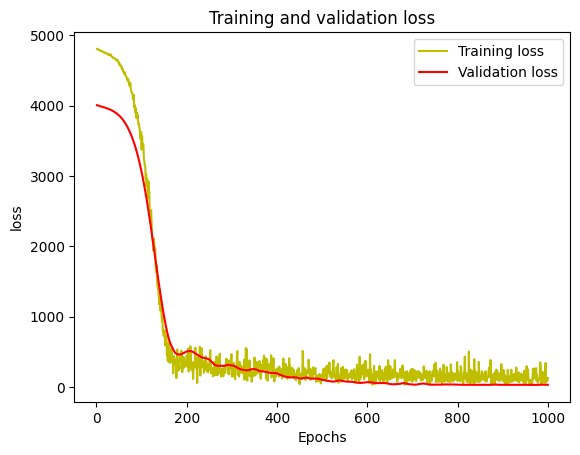

In [29]:
# Plot the training and validation accuracy at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

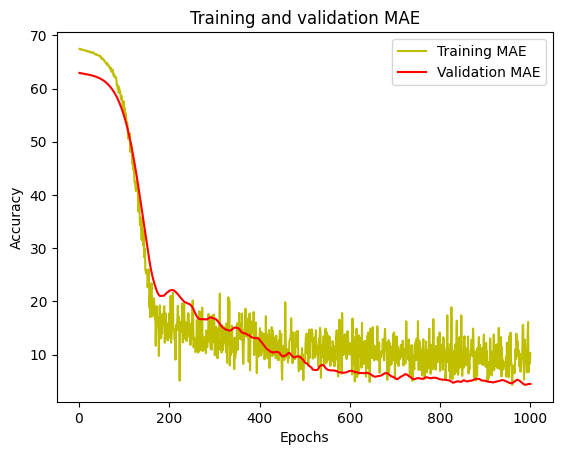

In [20]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

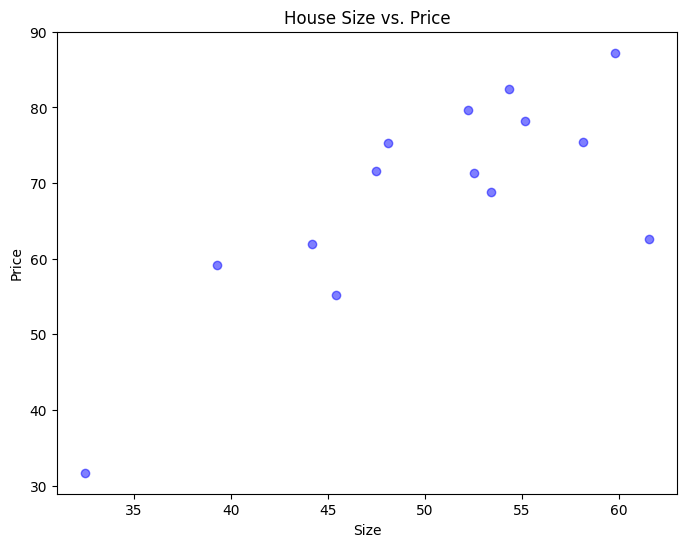

In [21]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.title('House Size vs. Price')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

# 5) Price Prediction

In [22]:
# Predictions on test data
predictions = model.predict(X_test_scaled[:5])
print("Predicted Values : ",predictions)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 20ms/step
Predicted Values :  [[74.22369]
 [73.90246]
 [68.68539]]
Real values are:  13    75.392870
11    82.478847
8     75.331242
Name: PRICE, dtype: float64


In [26]:
# Predict the office price when the size is 100 sq. ft.
size_to_predict = 100
scaled_size = scaler.transform([[size_to_predict]])
predicted_price = model.predict(scaled_size)
print(f'The predicted office price when the size is 100 sq. ft. is Ksh {predicted_price}')

1/1 [==============================] - 0s 19ms/step
The predicted office price when the size is 100 sq. ft. is Ksh [[127.166695]]
